In [0]:
import numpy as np
import cv2
from scipy.stats import mode , skew , kurtosis
from matplotlib import pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Lena.pgm to Lena.pgm
User uploaded file "Lena.pgm" with length 600287 bytes


In [0]:
img = cv2.imread('Lena.pgm',0) 

In [0]:
def Momento(imagem,n,d,k):
  output = np.zeros_like(imagem)                                         #cria matriz de zeros do tamanho da imagem
  output = np.dstack((output,output,output,output))                      #adiciona outra dimensao para armazenar todas as saidas em uma matriz
  w_x = int(np.floor((n-1)/2))                                           #valor inteiro do tamanho da mascara/2
  w_y = int(np.floor((n-1)/2))                                           #valor inteiro do tamanho da mascara/2
  padded_x = imagem.shape[0] + 2*w_x                                     #tamanho da imagem somado com n
  padded_y = imagem.shape[1] + 2*w_y                                     #tamanho da imagem somado com n
  image_padded = np.zeros((padded_x,padded_y))                           #"imagem aumentada" recebe zeros com tamanho da imagem + mascara
  image_padded[w_x:-w_x, w_y:-w_y] = imagem                              #salvando imagem dentro da imagem aumentada
  a = np.ones((256,256))                                                 #matriz criada para calcular valores de forma matricial
  b = np.eye((256))                                                      #matriz criada para calcular valores de forma matricial
  for i in range(256):                                                   #criando matriz diagonal com valores de 1 a 256
    b[i][i]=i
  a=np.matmul(b,a)                                                       #calculando produto matricial entre a e b para gerar uma 
  b=np.transpose(a)                                                      #matriz em que cada linha possui valores de 1 a 256
  
  for i in range(imagem.shape[0]-w_x):                                   #percorre as posicoes x da matriz
      for j in range(imagem.shape[1]-w_y):                               #percorre as posicoes y da matriz
          x_end = i + 2*w_x + 1
          y_end = j + 2*w_y + 1                                          #posicao x + tamanho da mascara
          image = image_padded[i:x_end,j:y_end]
          M = CoOccurence(image,d)
          M1=M*(a-b)                                                     #calcula momento
          M2=(np.absolute(a-b)**k)*(M**k)                                #calcula contraste
          M3=M*(400*400)/(np.absolute(a-b)+1)                            #calcula homogeinidade
          M4=M*(400*400)*np.log10(M*(400*400)+1)                         #calcula entropia
          output[i,j,0] = np.sum(M1)
          output[i,j,1] = np.sum(M2)
          output[i,j,2] = np.sum(M3)
          output[i,j,3] = np.sum(M4)
  return output

In [0]:
def Moments(imagem,k,d):
  M = CoOccurence(imagem,d)
  a = np.ones((256,256))                                                 #matriz criada para calcular valores de forma matricial
  b = np.eye((256))                                                      #matriz criada para calcular valores de forma matricial
  for i in range(256):                                                   #criando matriz diagonal com valores de 1 a 256
    b[i][i]=i
  a=np.matmul(b,a)                                                       #calculando produto matricial entre a e b para gerar uma 
  b=np.transpose(a)                                                      #matriz em que cada linha possui valores de 1 a 256
  M1=((a-b)**k)*M                                                        #calcula momento
  return np.sum(M1)

In [0]:
def Contrast(imagem,k,n,d):
  M = CoOccurence(imagem,d)
  a = np.ones((256,256))                                                 #matriz criada para calcular valores de forma matricial
  b = np.eye((256))                                                      #matriz criada para calcular valores de forma matricial
  for i in range(256):                                                   #criando matriz diagonal com valores de 1 a 256
    b[i][i]=i
  a=np.matmul(b,a)                                                       #calculando produto matricial entre a e b para gerar uma 
  b=np.transpose(a)                                                      #matriz em que cada linha possui valores de 1 a 256
  M1=(np.abs(a-b)**k)*(M**n)                                                        #calcula momento
  return np.sum(M1)

In [0]:
def Homogeneity(imagem,d):
  M = CoOccurence(imagem,d)
  a = np.ones((256,256))                                                 #matriz criada para calcular valores de forma matricial
  b = np.eye((256))                                                      #matriz criada para calcular valores de forma matricial
  for i in range(256):                                                   #criando matriz diagonal com valores de 1 a 256
    b[i][i]=i
  a=np.matmul(b,a)                                                       #calculando produto matricial entre a e b para gerar uma 
  b=np.transpose(a)
  M1 = M/(1+np.abs(a-b))   
  return np.sum(M1)

In [0]:
def Entropy(imagem,d):
  M = CoOccurence(imagem,d)
  M1 = M*np.log10(M)
  return np.sum(M1)

In [0]:
def CoOccurence(imagem,d):
  M = np.zeros((256,256)).astype(int)                                  #inicializa a saida
  p1 = np.zeros((256,1)).astype(int)                                   #inicializa vetor p1 
  p2 = np.zeros((256,1)).astype(int)                                   #inicializa vetor p2
  image = np.zeros((imagem.shape[0]+d,imagem.shape[1])).astype(int)    #matriz a ser percorrida
  image[0:-d,:] = imagem
  for x in range(imagem.shape[0]):
    for y in range(imagem.shape[1]):
      p1 = (image[x,y])                                               #p1 recebe nivel de cinza da posicao i e j
      p2 = (image[x+d,y])                                             #p2 recebe nivel de cinza da posicao 1 + d e j
      M[p1,p2] = M[p1,p2] + 1                                         #traça o histograma conjunto de p1 e p2
  return M/(imagem.shape[0]*imagem.shape[1])                          #normaliza os valores

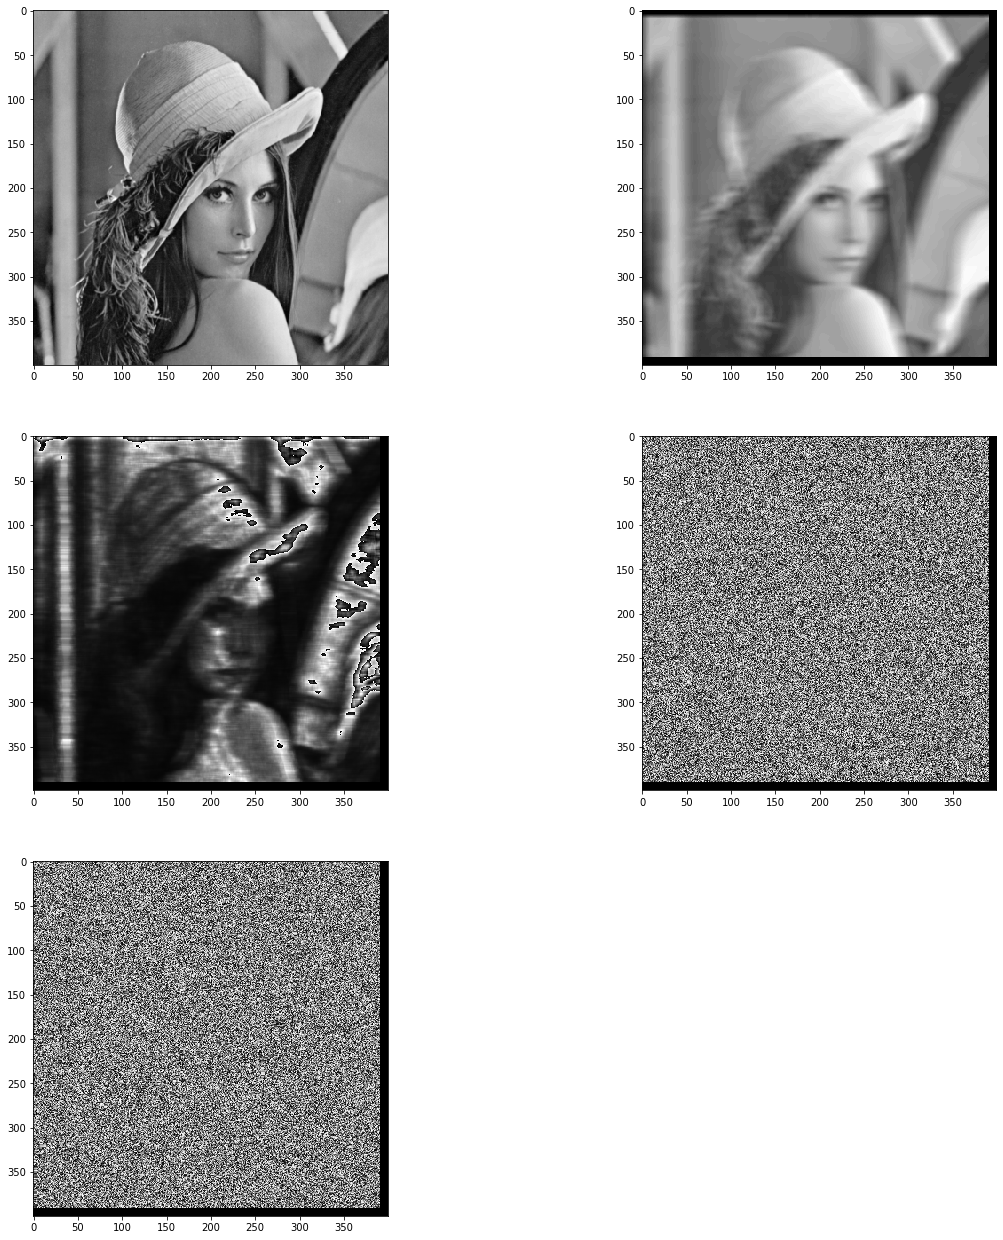

In [0]:
teste=np.zeros((100,100))
teste=img[200:300,200:300]

a=Momento(img,20,5,2)
"""for item in CoOccurence(img,10):
  for ite in item:
    print(ite)"""

plt.figure(figsize=(20,30))
plt.subplot(421)
plt.imshow(img, cmap = 'gray')
plt.subplot(422)
plt.imshow(a[:,:,0], cmap = 'gray')
plt.subplot(423)
plt.imshow(a[:,:,1], cmap = 'gray')
plt.subplot(424)
plt.imshow(a[:,:,2], cmap = 'gray')
plt.subplot(425)
plt.imshow(a[:,:,3], cmap = 'gray')


In [31]:
a=Moments(img,2,2)
b=Contrast(img,1,5,1)
c=Homogeneity(img,2)
d=Entropy(img,2)
print(a,b,c,d)

273.7573375 5.197648234734059e-13 0.32521592795299065 nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
